## Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Perform EDA

In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
val_count = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code','Region', 'Category', 'Sub-Category']

In [8]:
for value in val_count:
    print(value)
    print("------------------------------------------------------")
    print(df[value].value_counts())
    print("------------------------------------------------------")

Ship Mode
------------------------------------------------------
Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64
------------------------------------------------------
Segment
------------------------------------------------------
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
------------------------------------------------------
Country
------------------------------------------------------
Country
United States    9994
Name: count, dtype: int64
------------------------------------------------------
City
------------------------------------------------------
City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64
---------

In [9]:
df = df.drop(columns = 'Postal Code')

In [10]:
corr = df.select_dtypes(['float64', 'int64']).corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


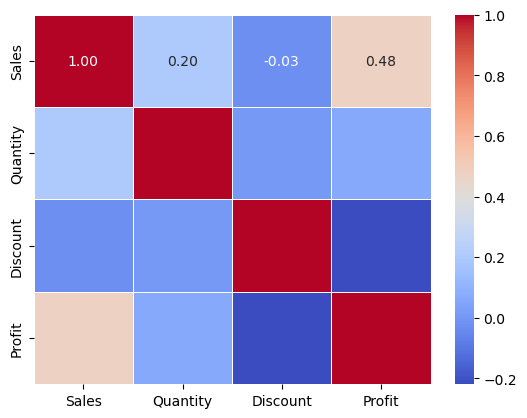

In [11]:
sns.heatmap(corr, annot = True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.show()

In [12]:
df.select_dtypes('object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper


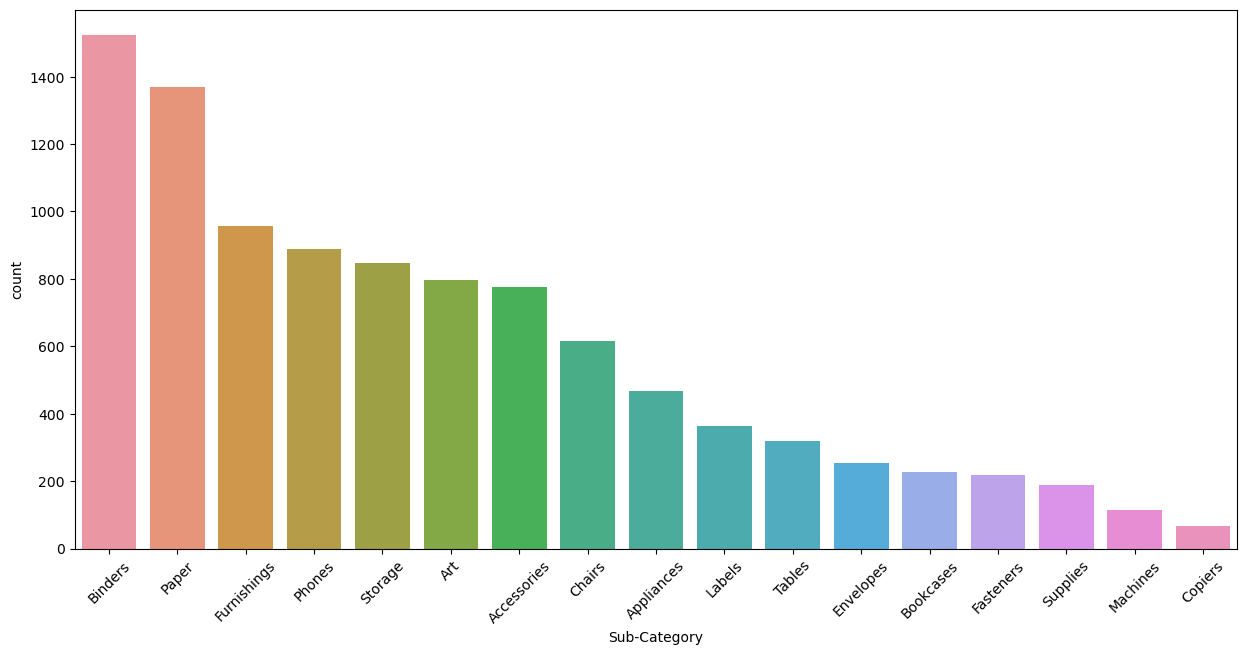

In [13]:
sub_cat_count = df['Sub-Category'].value_counts()
plt.figure(figsize=(15, 7))
sns.barplot(x=sub_cat_count.index, y=sub_cat_count)
plt.xticks(rotation=45)
plt.show()

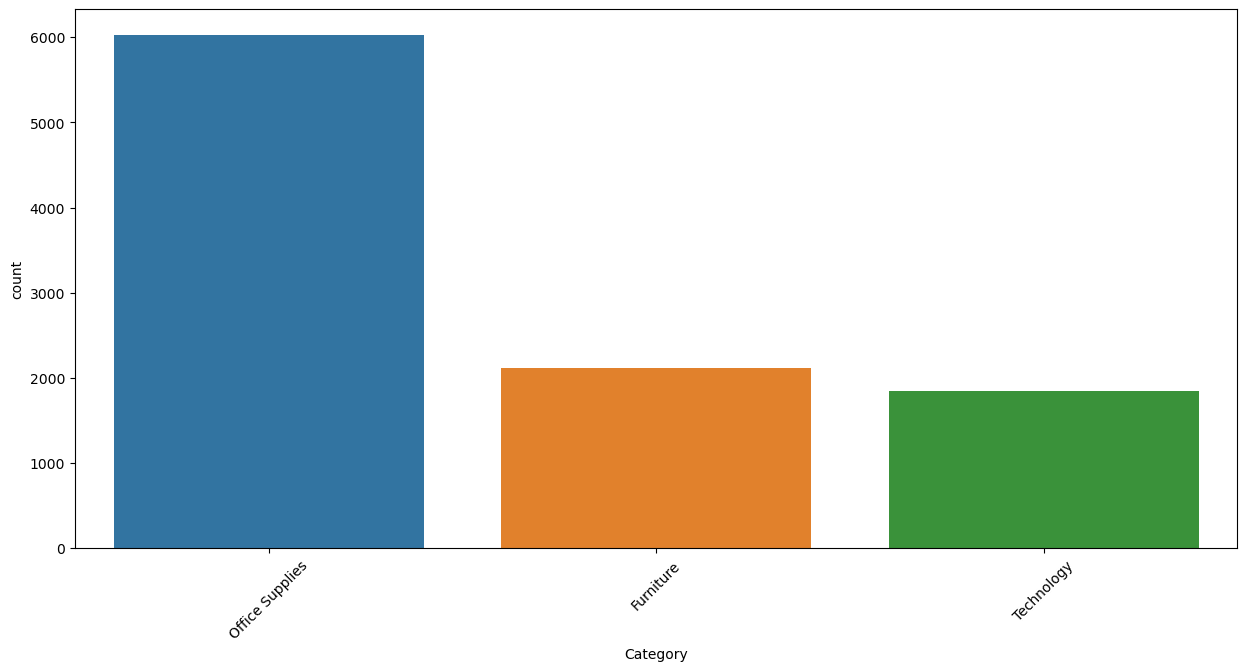

In [14]:
cat_count = df['Category'].value_counts()
plt.figure(figsize=(15, 7))
sns.barplot(x=cat_count.index, y=cat_count)
plt.xticks(rotation=45)
plt.show()

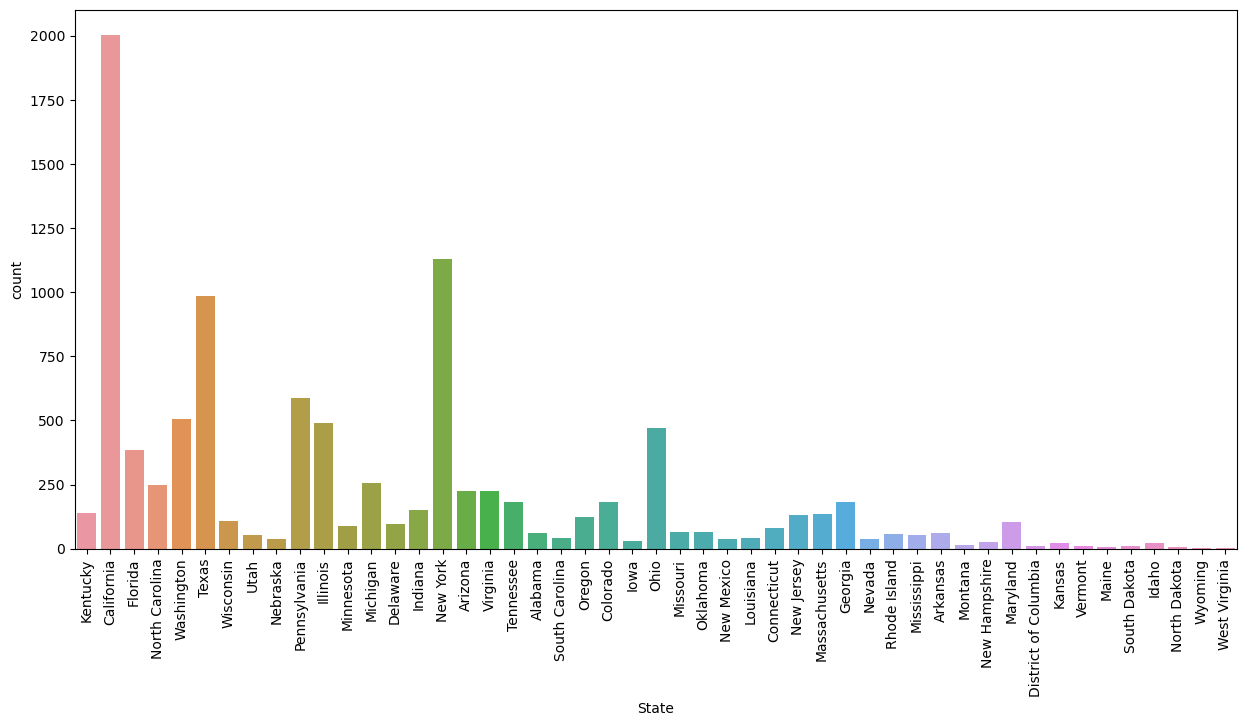

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.show()

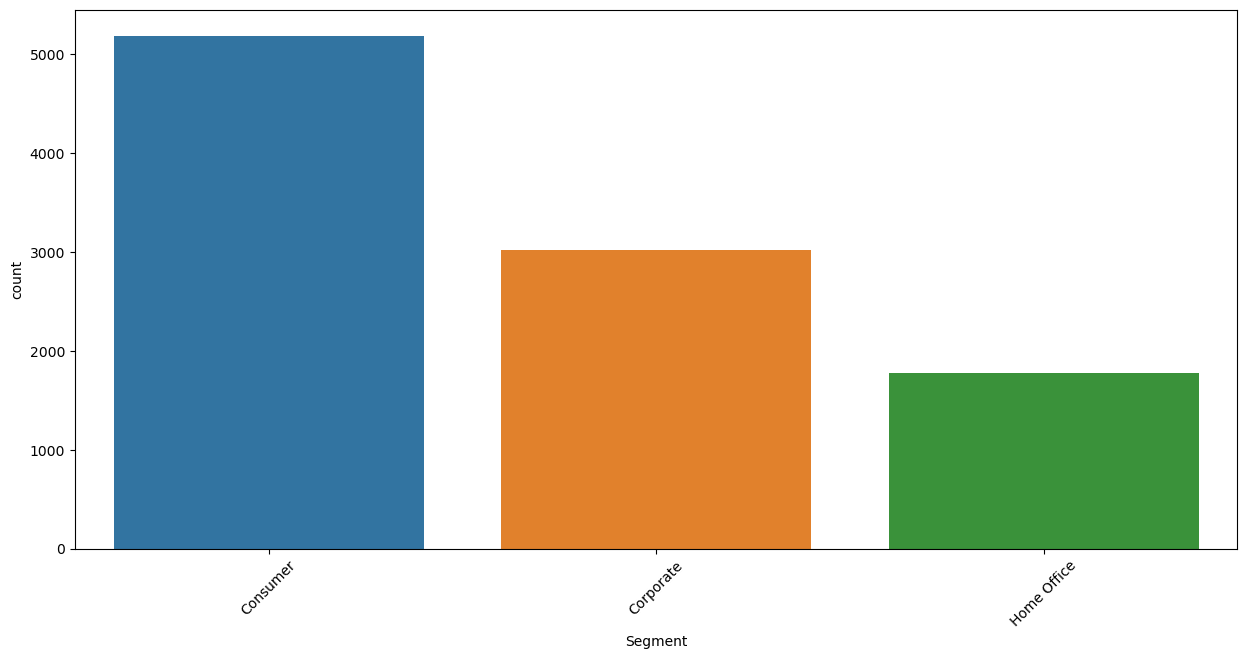

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Segment'])
plt.xticks(rotation=45)
plt.show()

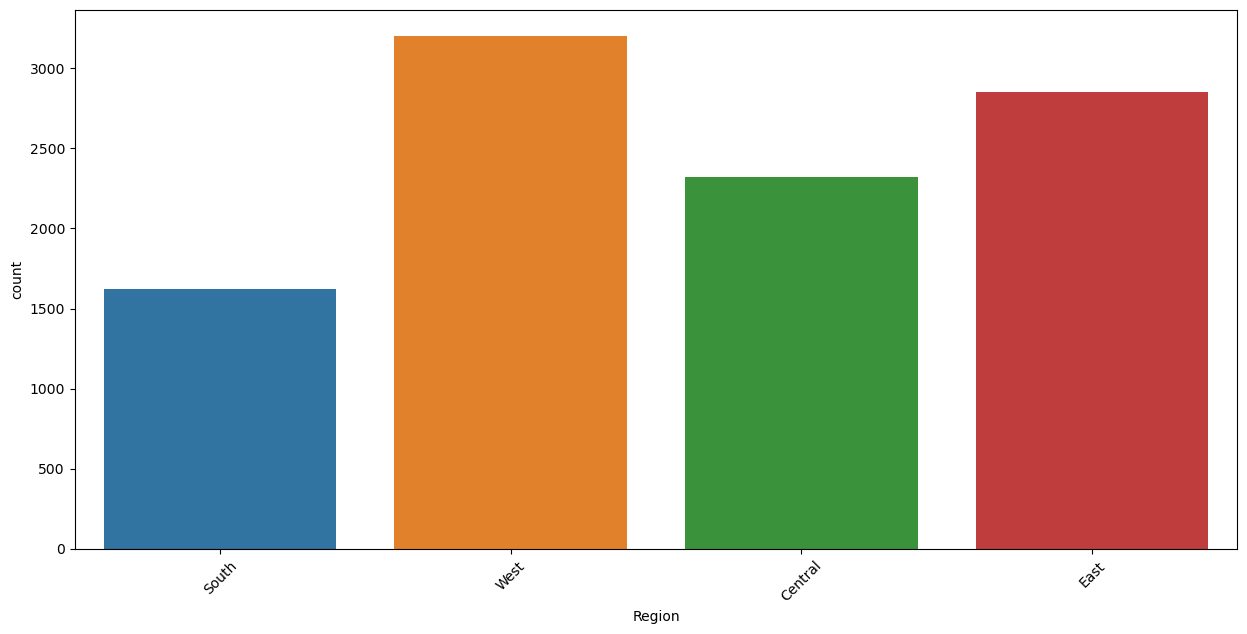

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['Region'])
plt.xticks(rotation=45)
plt.show()

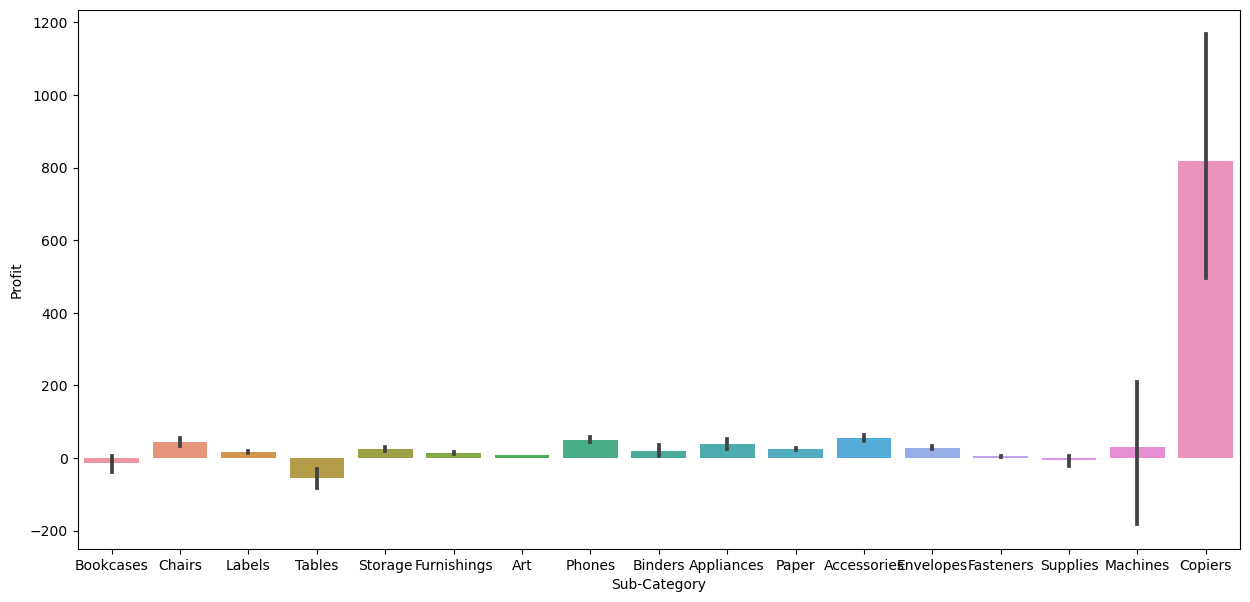

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Sub-Category'], y=df['Profit'])
plt.show()

In [25]:
plt.figure(figsize=(30, 20))
sns.lineplot(x='Discount', y='Profit', hue='Profit', data=df, color='blue', label='Discount')
plt.show()

ValueError: Image size of 2421x152843 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x2000 with 1 Axes>

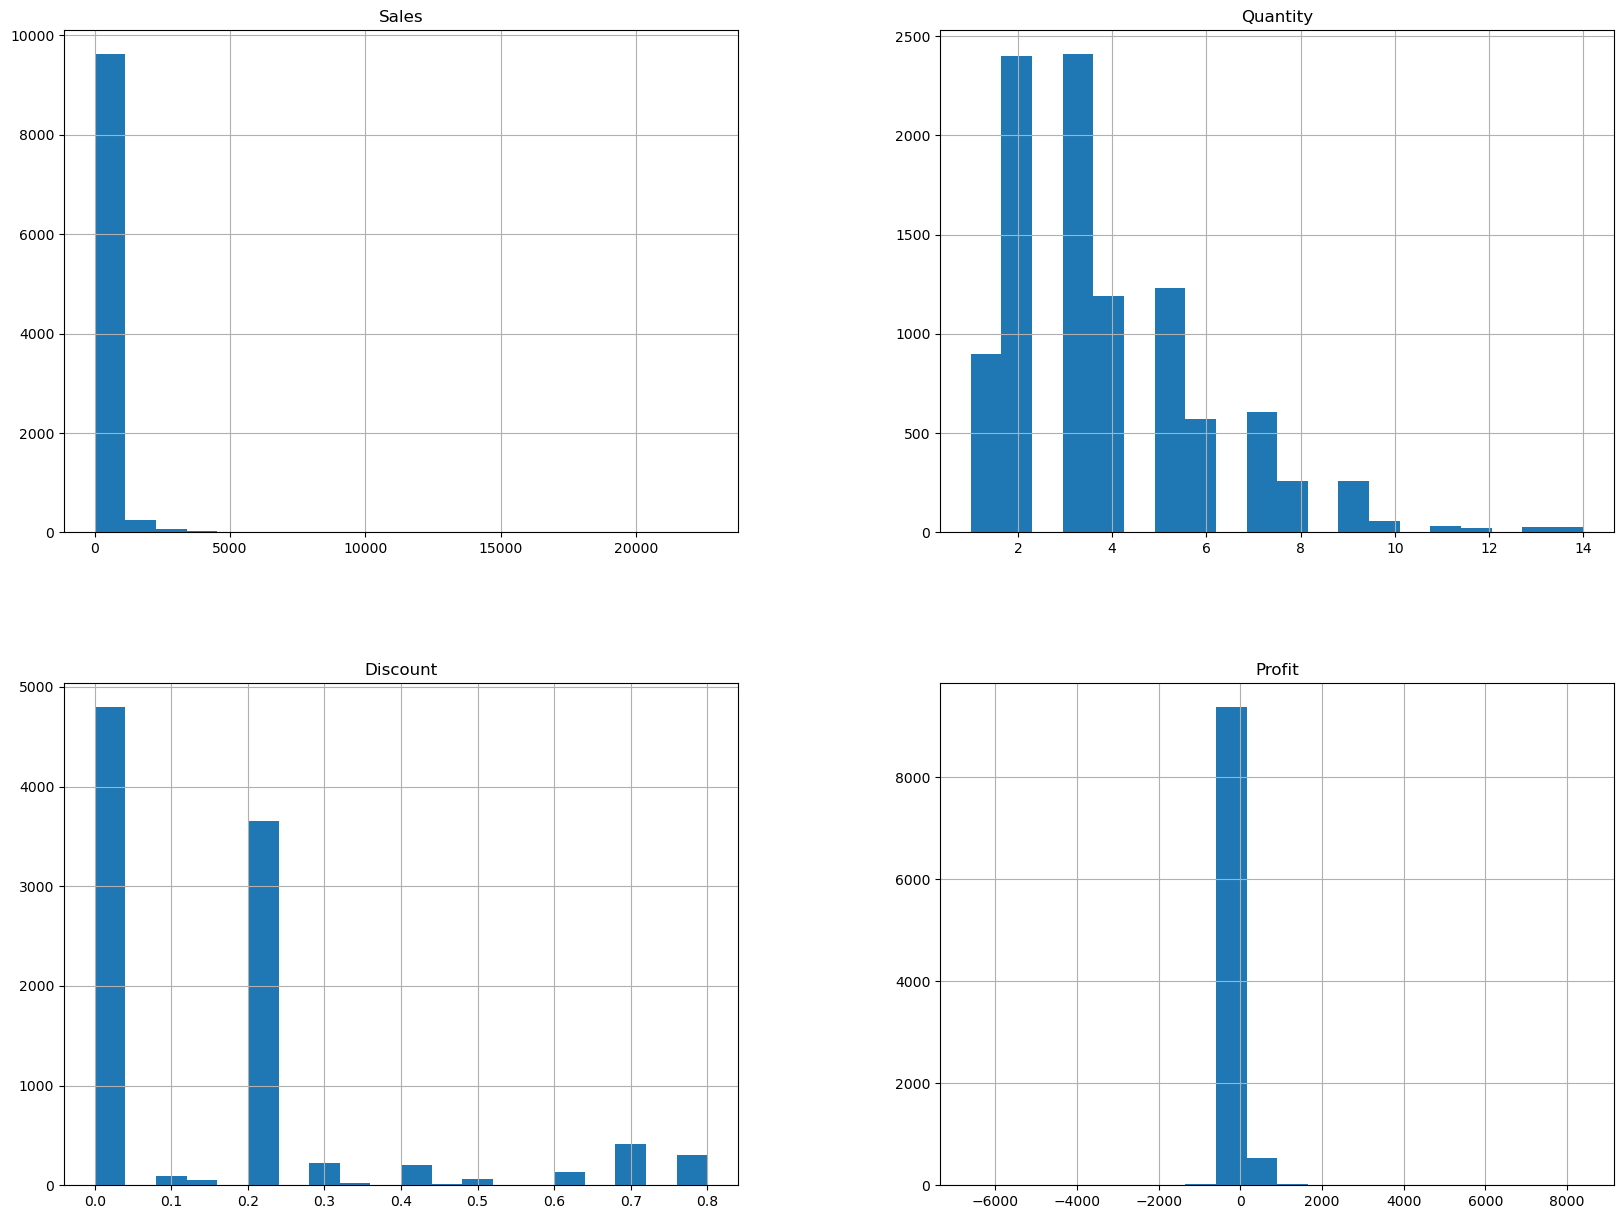

In [20]:
df.hist(bins=20 ,figsize=(20,15))
plt.show()

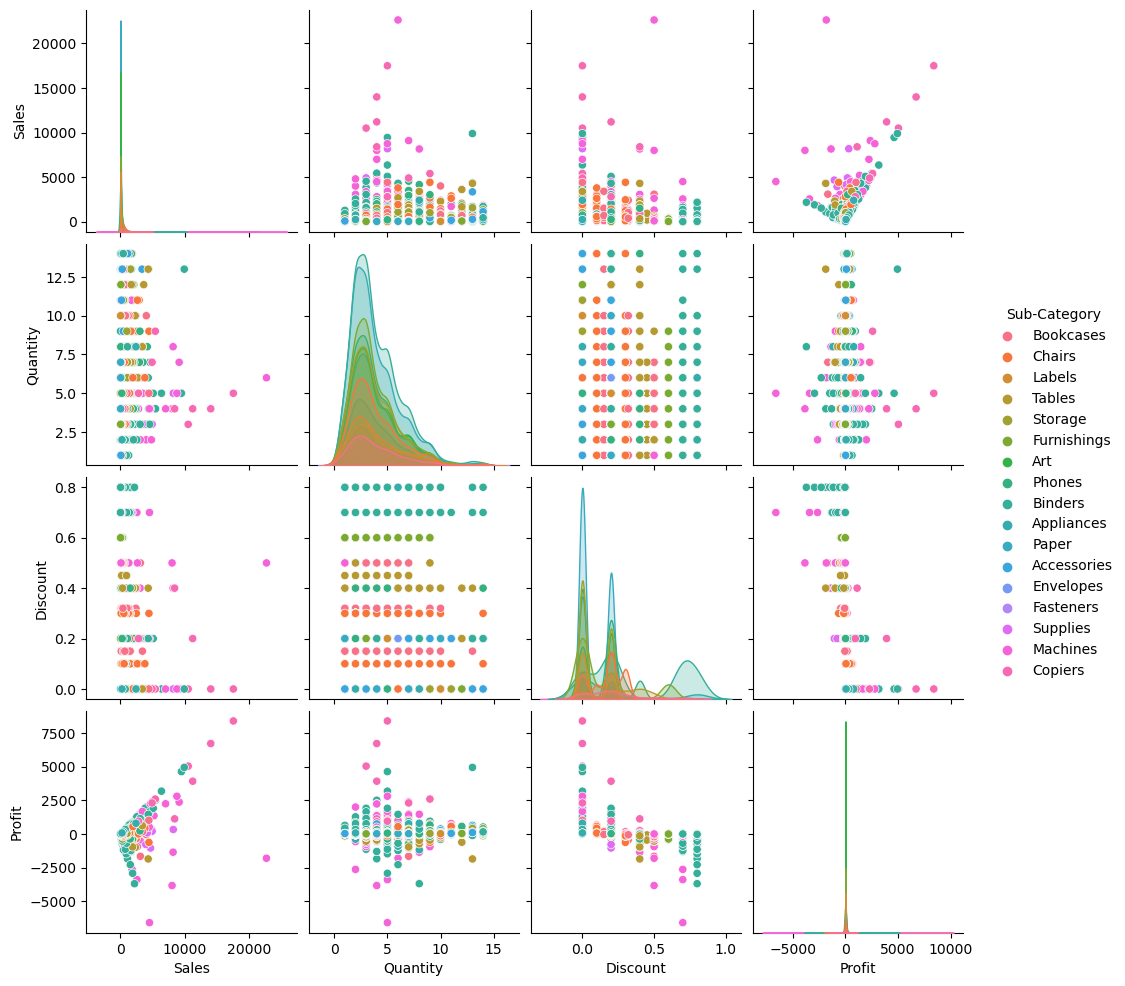

In [21]:
figsize=(20,10)
sns.pairplot(df,hue='Sub-Category')
plt.show()